# General Assembly Capstone: Time Series Forecasting of Texas Electricity Data
----

## <span style="color:Green">02 - Exploratory Data Analysis</span>      
----

### Imports

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



## 1. Read the data

In [187]:
df = pd.read_csv('../data/final_dfs/combined_final.csv')
df.head()

,date,Biomass,Coal,Hydro,Nuclear,Other,Solar,Wind,NGas
0,2011-01-01,1240.848016,304483.8981,670.712237,90516.91023,357.449324,70.651290,123213.38820,248086.36399
1,2011-01-02,1478.590690,320703.6726,667.009668,90462.21494,372.626928,10.255158,62531.39844,268971.64998
2,2011-01-03,1483.246127,296436.2237,741.426017,90472.37075,401.536782,15.155827,89515.57352,222285.00985
3,2011-01-04,1411.010006,322214.6377,683.281626,90312.68708,478.415477,5.278214,59542.48570,271747.93685
4,2011-01-05,1348.331266,308136.0801,623.145421,90280.19160,440.383112,22.997359,128920.84250,358001.80005


#### Convert the date column to the datetime format and drop the 'Other' column as it contains negatives and plays a very minor role in Texas electrcity generation

In [188]:
df['date']=pd.to_datetime(df['date'])
df['Date'] = df['date']
df.drop(columns='Other', inplace=True)

In [189]:
df.set_index('date', inplace=True)

#### Create a total column, which sums all energy sources. Additionaly, creating a 'year' column that takes the year from each date row will assist in boxplots below.

In [190]:
df['total'] = df.sum(axis=1)
df['year'] = df['Date'].dt.year
df.drop(columns='Date', inplace=True)

In [191]:
df.head()

,Biomass,Coal,Hydro,Nuclear,Solar,Wind,NGas,total,year
date,,,,,,,,,
2011-01-01,1240.848016,304483.8981,670.712237,90516.91023,70.651290,123213.38820,248086.36399,768282.772063,2011
2011-01-02,1478.590690,320703.6726,667.009668,90462.21494,10.255158,62531.39844,268971.64998,744824.791476,2011
2011-01-03,1483.246127,296436.2237,741.426017,90472.37075,15.155827,89515.57352,222285.00985,700949.005791,2011
2011-01-04,1411.010006,322214.6377,683.281626,90312.68708,5.278214,59542.48570,271747.93685,745917.317176,2011
2011-01-05,1348.331266,308136.0801,623.145421,90280.19160,22.997359,128920.84250,358001.80005,887333.388296,2011


## 2. EDA

In [192]:
df.describe()

,Biomass,Coal,Hydro,Nuclear,Solar,Wind,NGas,total,year
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3.653000e+03,3653.000000
mean,1327.163645,284440.743269,1748.186523,109387.060258,5613.363671,141435.072184,420148.248388,9.640998e+05,2015.500411
std,719.778087,79119.921168,1447.742803,17481.001198,8195.469715,86596.760859,143331.949064,1.749407e+05,2.873056
min,483.485931,71255.991534,163.483238,38545.569510,0.000000,5476.535508,111674.733140,6.217554e+05,2011.000000
25%,859.455307,223594.832342,738.823417,91322.922285,444.168724,75418.515750,309859.921605,8.211437e+05,2013.000000
50%,1119.964359,289046.037828,1389.403940,119925.111670,1531.330155,122878.732298,405716.851633,9.293019e+05,2016.000000
75%,1355.162995,347623.332300,2194.439610,122207.584711,8131.417326,189346.976009,521587.595840,1.101561e+06,2018.000000
max,4416.831028,450153.125539,9940.544975,125143.500320,43144.220811,456011.509614,857379.946273,1.439676e+06,2020.000000


#### Let's create a new dataframe that normalizes all energy sources relative to the total electricity generated.

In [193]:
df_percent = pd.DataFrame(columns=['Date', 'Biomass', 'Coal', 'Hydro', 'Nuclear', 'Solar', 'Wind', 'NGas'])

In [194]:
df_percent['Biomass'] = df['Biomass'] / df['total']
df_percent['Coal'] = df['Coal'] / df['total']
df_percent['Hydro'] = df['Hydro'] / df['total']
df_percent['Nuclear'] = df['Nuclear'] / df['total']
df_percent['Solar'] = df['Solar'] / df['total']
df_percent['Wind'] = df['Wind'] / df['total']
df_percent['NGas'] = df['NGas'] / df['total']

In [197]:
df_percent.drop(columns='Date', inplace=True)
df_percent

,Biomass,Coal,Hydro,Nuclear,Solar,Wind,NGas
date,,,,,,,
2011-01-01,0.001615,0.396317,0.000873,0.117817,0.000092,0.160375,0.322910
2011-01-02,0.001985,0.430576,0.000896,0.121454,0.000014,0.083955,0.361121
2011-01-03,0.002116,0.422907,0.001058,0.129071,0.000022,0.127706,0.317120
2011-01-04,0.001892,0.431971,0.000916,0.121076,0.000007,0.079825,0.364314
2011-01-05,0.001520,0.347261,0.000702,0.101743,0.000026,0.145290,0.403458
...,...,...,...,...,...,...,...
2020-12-27,0.000744,0.215912,0.000586,0.143736,0.034915,0.376218,0.227890
2020-12-28,0.000653,0.213966,0.000703,0.135615,0.022019,0.387823,0.239221
2020-12-29,0.000748,0.162516,0.000722,0.137577,0.013004,0.497060,0.188373


## Area plot of normalized electrcity generation by source

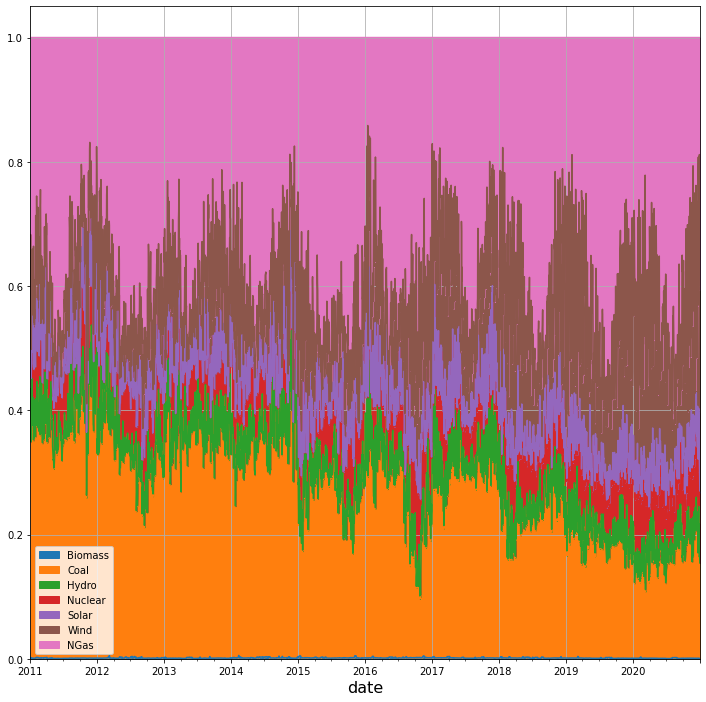

In [203]:
df_percent.plot.area(figsize=(12,12));
plt.grid(True)

#### The above plot depicts relative usage of different energy sources for electricity generation in the ERCOT grid system. What's notable is the precipitous decrease in coal as a primary source, which drops from approximately 35% in 2011 to less than 20% in 2020. At the top of the graph, natural gas can be observed in dark pink as representing the greatest area on the plot. In particular, natural gas can be observed to contribute greater quantities of energy to the grid during the hot summer months when demand is typically highest.

## Temporal variability shown by rolling 30 day averages 

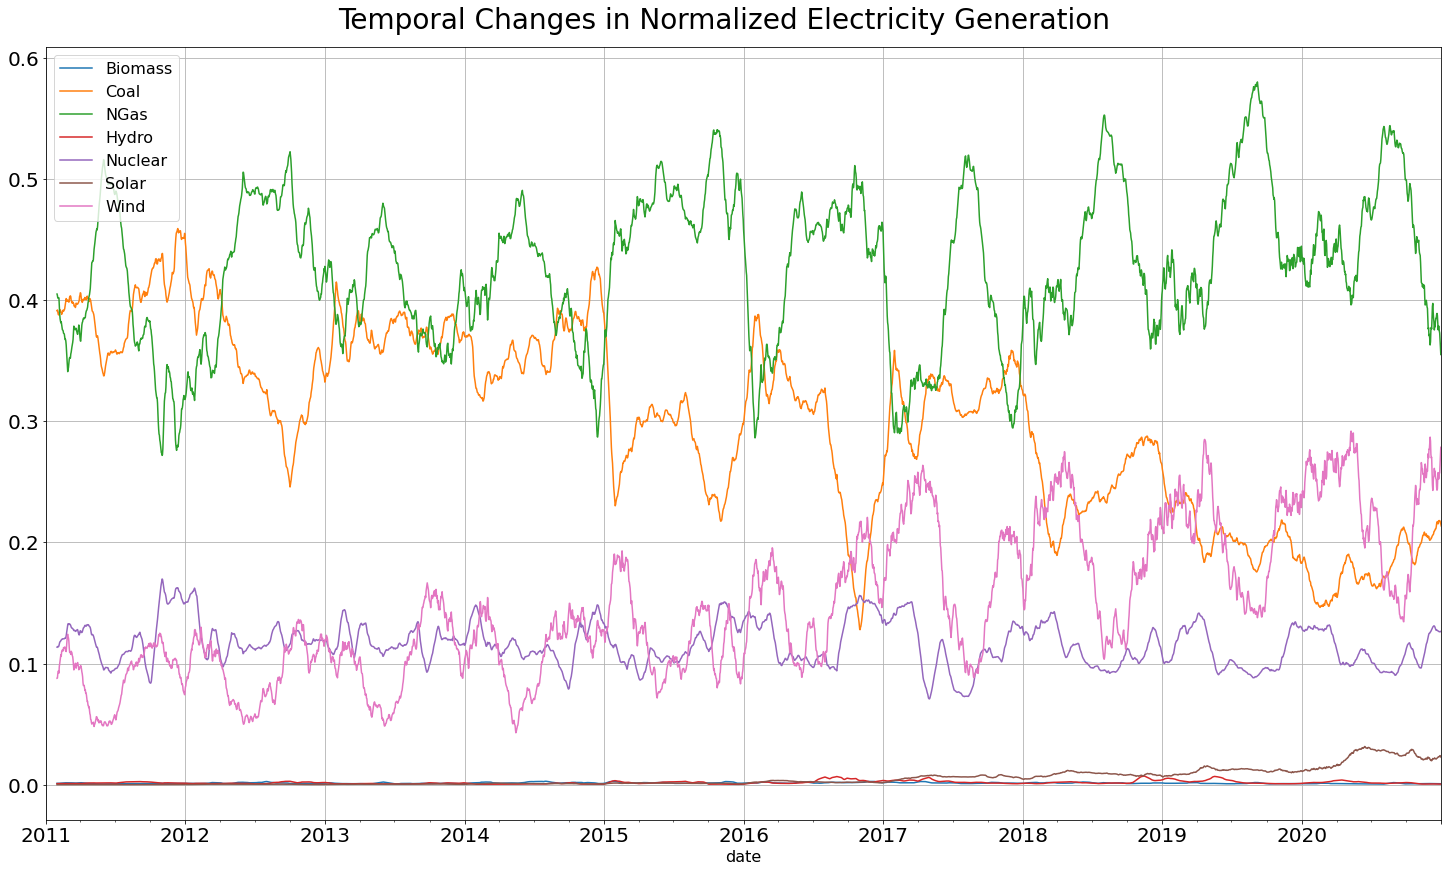

In [246]:
plt.figure(figsize=(20,12), constrained_layout=True);

df_percent.rolling(30)['Biomass'].mean().plot(kind='line');
df_percent.rolling(30)['Coal'].mean().plot(kind='line');
df_percent.rolling(30)['NGas'].mean().plot(kind='line');
df_percent.rolling(30)['Hydro'].mean().plot(kind='line');
df_percent.rolling(30)['Nuclear'].mean().plot(kind='line');
df_percent.rolling(30)['Solar'].mean().plot(kind='line');
df_percent.rolling(30)['Wind'].mean().plot(kind='line');

plt.grid(True)
plt.suptitle('Temporal Changes in Normalized Electricity Generation', va='top', fontsize=28);
plt.legend(['Biomass', 'Coal', 'NGas', 'Hydro', 'Nuclear', 'Solar', 'Wind'], loc=2, fontsize=16);
plt.yticks(fontsize=20);
plt.xticks(fontsize=20);

#### The above lineplot shows how different sources of energy are utilized for Texas electricity generation. During the period from 2011-2020, natural gas is the dominant energy source for the Texas grid. Brief period show coal briefly eclipse natural gas, however this was during periods of relatively high natural gas commodity prices. This therefore made coal a more economical alternative. From 2015 forward, coal proceeds to precipitously decrease its share in the Texas energy mix likely due to huge supply increases and assocaited price decreases caused by the unconvenitional drilling taking place throughout the country. Wind energy sees continued increasing relevance in the fuel mix, which increases from approximately 10% to 20% over the period from 2011-2020. Nuclear is observed to have a slow decline as cheaper sources like natural gas and wind become to cheap to compete with. While solar had virtually no contribution to electricity generation in Texas, it can be observed to begin making a small, yet notable increase in the Texas energy mix. By the end of 2020, solar amounts to approximately 3% of the mix.

## Investigating spread with boxplots 

In [63]:
df['NGas'].groupy

date
2011-01-01    248086.363990
2011-01-02    268971.649980
2011-01-03    222285.009850
2011-01-04    271747.936850
2011-01-05    358001.800050
                  ...      
2020-12-27    194637.587100
2020-12-28    216475.798107
2020-12-29    167954.504264
2020-12-30    227983.660971
2020-12-31    439845.363552
Name: NGas, Length: 3653, dtype: float64

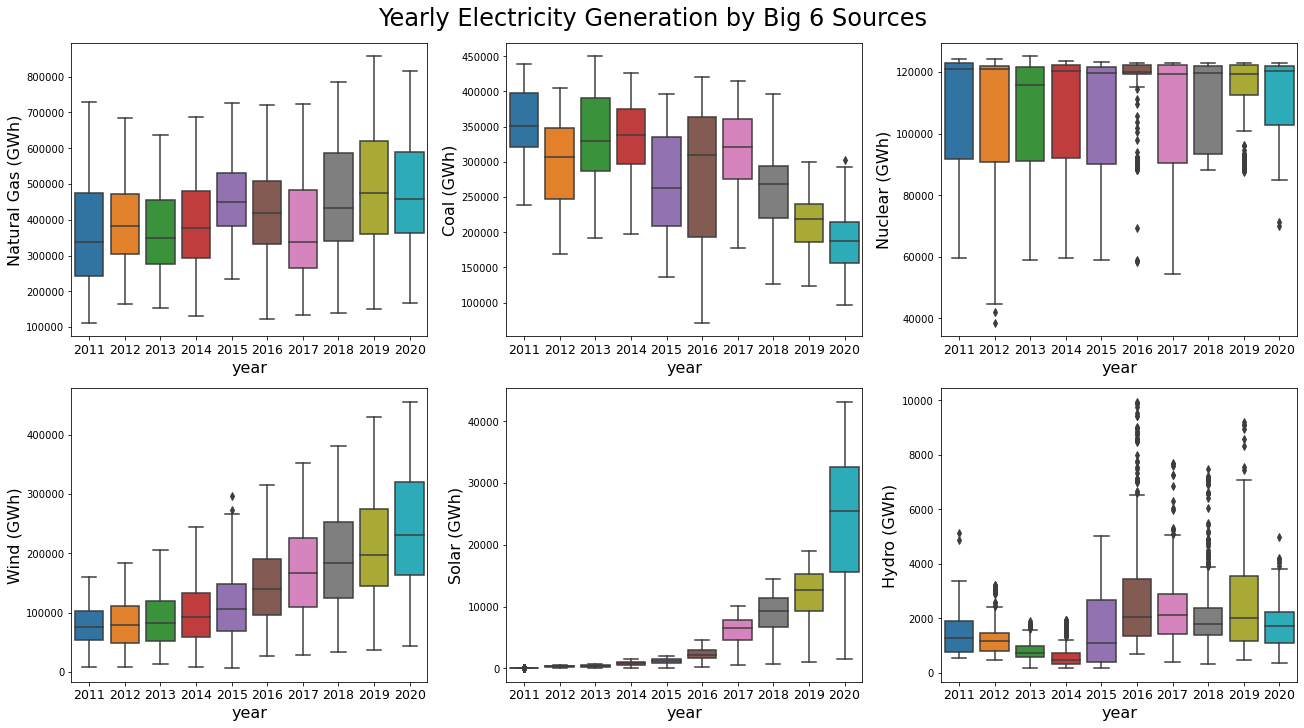

In [242]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)

fig.suptitle('Yearly Electricity Generation by Big 6 Sources', va='top', fontsize=24)
plt.rc('xtick', labelsize=12.5)
plt.rc('ytick', labelsize=10)



sns.boxplot(ax = axes[0, 0], data=df, x='year', y='NGas');
axes[0,0].set_ylabel('Natural Gas (GWh)');
sns.boxplot(ax = axes[0, 1], data=df, x='year', y='Coal');
axes[0,1].set_ylabel('Coal (GWh)');
sns.boxplot(ax = axes[0, 2], data=df, x='year', y='Nuclear');
axes[0,2].set_ylabel('Nuclear (GWh)');
sns.boxplot(ax = axes[1, 0], data=df, x='year', y='Wind');
axes[1,0].set_ylabel('Wind (GWh)');
sns.boxplot(ax = axes[1, 1], data=df, x='year', y='Solar');
axes[1,1].set_ylabel('Solar (GWh)');
sns.boxplot(ax = axes[1, 2], data=df, x='year', y='Hydro');
axes[1,2].set_ylabel('Hydro (GWh)');



#### Above, we can dig deeper into individual energy sources that contribute to the electric grid in Texas from 2011-2020. First, in the top left, we can see natural gas has steadily increased it's position as the largest contributor to the Texas electricity grid. While the mean values were relatviely stable from 2011-2014, we begin to see an increase in the mean thereafter despite a slight decrease in 2017. Much of the increase in natural gas usage is attributed to the increased supply afforeded by unconventional oil and gas activity throughout the state. We do see relatively consistent spreads across each year of the box plot, which likely represent its reliability as a fuel source given the high amount of production in the region. 

#### The next plot, coal, shows a steady decrease in relevance as an energy source. This was observed in prior plots, but is once again reinforced. The mean coal usage is approximately 40% lower in 2020 than 2011. We do see a shrinking interquartile range by 2020, which likely indicates that while its usage is decreasing, we are using it in consistent amounts.

#### Nuclear is plotter on the top right and shows consistent usage throghout the study interval. The mean usage stays within approximately 10% during the study interval, yet shows a somewhat shrinking spread in values by 2020. This could indicate that while it is not a high contributor to the system, what it does contribute is reliability. 

#### On the bottom left and center are the two renewables gaining much attention these days - wind and solar. Both show a simialr trajectory in relevance in the grid. Both have mean usage increasing exponentionally through time. Interestingly, as they increase in usage, so does their spread also increase. This likely highlights their fundamentaly challenge - intermittency. While they are relatively low in emissions, they are at the mercy of mother nature and cannot be utilized as reliably as natural gas, nuclear, or coal.

#### Finally, hydro is depicted on the bottom right. It has maintained relatively stable, albeit low, usage in Texas. The boxplots depict several outliers potentially related to water releases by dams in central Texas that power much of the hydro power in the state.